In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
kospi = pd.read_csv('코스피 200 내역 (1).csv')

In [3]:
kospi = kospi.sort_values(by=['날짜']).reset_index(drop=True)
kospi

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2014년 01월 02일,257.64,264.35,264.51,257.63,64.00K,-2.50%
1,2014년 01월 03일,254.48,257.05,257.29,253.18,62.39K,-1.23%
2,2014년 01월 06일,255.41,254.70,256.67,254.11,59.08K,0.37%
3,2014년 01월 07일,255.98,254.53,257.02,254.41,60.98K,0.22%
4,2014년 01월 08일,255.76,256.85,257.06,254.63,66.03K,-0.09%
...,...,...,...,...,...,...,...
1715,2020년 12월 23일,371.32,367.02,371.93,364.72,296.02M,1.33%
1716,2020년 12월 24일,379.18,371.67,380.29,371.67,314.37M,2.12%
1717,2020년 12월 28일,379.93,381.51,383.84,378.44,304.33M,0.20%
1718,2020년 12월 29일,381.27,380.34,382.31,377.04,234.72M,0.35%


In [4]:
kospi['mean'] = (kospi['종가'] + kospi['오픈'] + kospi['고가'] + kospi['저가']) / 4

In [5]:
kospi

,날짜,종가,오픈,고가,저가,거래량,변동 %,mean
0,2014년 01월 02일,257.64,264.35,264.51,257.63,64.00K,-2.50%,261.0325
1,2014년 01월 03일,254.48,257.05,257.29,253.18,62.39K,-1.23%,255.5000
2,2014년 01월 06일,255.41,254.70,256.67,254.11,59.08K,0.37%,255.2225
3,2014년 01월 07일,255.98,254.53,257.02,254.41,60.98K,0.22%,255.4850
4,2014년 01월 08일,255.76,256.85,257.06,254.63,66.03K,-0.09%,256.0750
...,...,...,...,...,...,...,...,...
1715,2020년 12월 23일,371.32,367.02,371.93,364.72,296.02M,1.33%,368.7475
1716,2020년 12월 24일,379.18,371.67,380.29,371.67,314.37M,2.12%,375.7025
1717,2020년 12월 28일,379.93,381.51,383.84,378.44,304.33M,0.20%,380.9300
1718,2020년 12월 29일,381.27,380.34,382.31,377.04,234.72M,0.35%,380.2400


In [6]:
## 불필요한 columns 삭제
drop_kospi = ['종가', '오픈', '고가', '저가', '거래량', '변동 %']
kospi = kospi.drop(drop_kospi, axis=1)

In [7]:
kospi

,날짜,mean
0,2014년 01월 02일,261.0325
1,2014년 01월 03일,255.5000
2,2014년 01월 06일,255.2225
3,2014년 01월 07일,255.4850
4,2014년 01월 08일,256.0750
...,...,...
1715,2020년 12월 23일,368.7475
1716,2020년 12월 24일,375.7025
1717,2020년 12월 28일,380.9300
1718,2020년 12월 29일,380.2400


In [8]:
# 결측치 없음
kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1720 non-null   object 
 1   mean    1720 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.0+ KB


In [9]:
kospi.describe()

,mean
count,1720.000000
mean,275.106390
std,29.786677
min,202.000000
25%,252.363125
50%,267.350000
75%,296.470000
max,384.920000


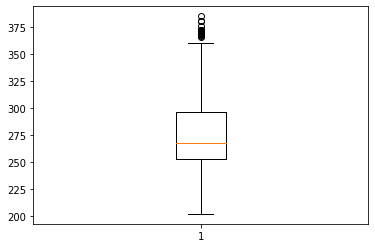

In [10]:
# 이상치 존재
plt.boxplot(kospi['mean'])
plt.show()

(array([  4.,  90., 489., 428., 241., 196., 205.,  41.,   9.,  17.]),
 array([202.   , 220.292, 238.584, 256.876, 275.168, 293.46 , 311.752,
        330.044, 348.336, 366.628, 384.92 ]),
 <a list of 10 Patch objects>)

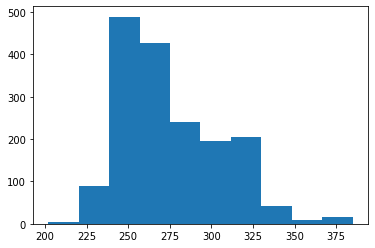

In [11]:
# 왼쪽으로 쏠림 -> 정규성 만족 x
plt.hist(kospi['mean'])

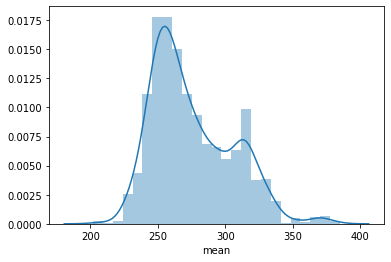

In [12]:
sns.distplot(kospi['mean'])

In [13]:
kospi['mean'].skew()

0.7407013799233936

In [14]:
kospi['mean'].kurt()

0.04681173993049814

In [17]:
# 제곱하면 skew가 더 커짐
kospi_sqrt = (kospi['mean'])**2

In [18]:
kospi_sqrt.skew()

0.9824264589377149

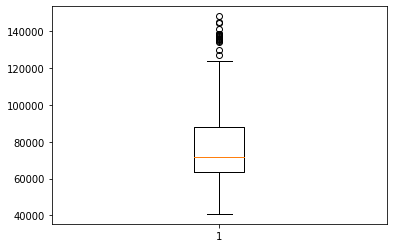

In [19]:
plt.boxplot(kospi_sqrt)
plt.show()

In [20]:
# 로그화히면 skew가 작아지므로 로그화 진행
kospi_log = np.log1p(kospi['mean'])

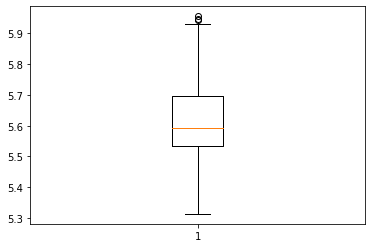

In [21]:
plt.boxplot(kospi_log)
plt.show()

In [22]:
kospi_log.skew()

0.5192801667817702

In [23]:
kospi['mean_log']= np.log1p(kospi['mean'])

In [24]:
kospi

,날짜,mean,mean_log
0,2014년 01월 02일,261.0325,5.568469
1,2014년 01월 03일,255.5000,5.547129
2,2014년 01월 06일,255.2225,5.546046
3,2014년 01월 07일,255.4850,5.547070
4,2014년 01월 08일,256.0750,5.549368
...,...,...,...
1715,2020년 12월 23일,368.7475,5.912820
1716,2020년 12월 24일,375.7025,5.931456
1717,2020년 12월 28일,380.9300,5.945237
1718,2020년 12월 29일,380.2400,5.943429


In [26]:
kospi.to_csv(r"kospi.csv")